In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import statistics as stat

from matplotlib.font_manager import FontProperties
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.cluster import AgglomerativeClustering
from sklearn import manifold
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base

%matplotlib inline
plt.rcParams['axes.unicode_minus']=False
engine = create_engine('sqlite:///fund.db')

In [2]:
def getTimeStamp(date):
    return int(pd.read_sql(sql='select strftime("%s",?)', con=engine, params=[date]).loc[0][0])

In [3]:
def getNAV(names,start,end):
    start = getTimeStamp(start)
    end = getTimeStamp(end)
    data = pd.read_sql(sql='select * from price where date between ? and ? order by date asc',
                       con=engine,index_col='date', params=[start,end])
    date = pd.read_sql(sql='select distinct date from price where date between ? and ? order by date asc',
                       con=engine,index_col='date', params=[start,end]).index
    NAV = np.zeros((len(names),len(date)))
    for j in range (len(names)):
        temp = data[data['id'] == names[j]]
        NAV[j][0] = temp.iloc[0]['NAV']
        for i,day in enumerate(date[1:]):
            try:
                NAV[j][i+1] = temp.loc[day]['NAV']
            except:
                NAV[j][i+1] = NAV[j][i]
    return NAV

In [4]:
def poolDecide(year):
    start = getTimeStamp(year + '-12-01')
    end = getTimeStamp(year + '-12-31')
    names = pd.read_sql(sql='select distinct id from price where date between ? and ?',
                        con=engine, params=[start,end])
    names = names['id'].sample(n=300).values
    return names

In [5]:
year = input("請輸入欲回測年：")
past_year = str(int(year)-1)

請輸入欲回測年：2017


# 0. 抓出0050各項數據

## 一. 淨值

In [6]:
NAV_0050 = getNAV(['0050 元大台灣50'],year+'-01-01',year+'-12-31')[0]

In [7]:
NAV_0050

array([72.03, 72.07, 72.58, 72.75, 72.56, 72.61, 72.47, 73.14, 72.78,
       72.05, 72.54, 72.25, 72.05, 72.19, 73.07, 73.18, 72.84, 72.89,
       73.4 , 73.63, 71.76, 72.14, 72.88, 73.26, 73.27, 73.9 , 73.66,
       73.48, 73.48, 73.37, 73.48, 73.39, 73.34, 73.2 , 72.44, 72.64,
       72.13, 72.33, 72.78, 72.96, 72.17, 72.03, 72.68, 72.96, 72.98,
       73.87, 74.36, 74.36, 75.05, 74.57, 74.58, 74.33, 74.39, 74.52,
       74.13, 73.97, 73.57, 75.01, 74.5 , 74.21, 74.28, 74.16, 74.18,
       74.33, 73.72, 73.6 , 73.63, 72.83, 72.85, 73.59, 73.69, 74.62,
       74.54, 74.59, 74.74, 75.38, 75.67, 75.68, 75.19, 75.82, 75.97,
       76.21, 76.59, 76.24, 76.58, 76.5 , 76.37, 76.01, 75.77, 76.17,
       76.29, 76.5 , 77.09, 77.06, 76.27, 76.81, 77.35, 77.33, 78.01,
       77.75, 77.9 , 78.02, 77.82, 76.85, 77.04, 76.83, 76.97, 77.56,
       78.42, 79.41, 79.32, 79.79, 79.67, 81.58, 81.3 , 80.45, 80.86,
       80.49, 80.76, 80.09, 80.81, 80.64, 80.04, 80.13, 81.65, 81.66,
       82.39, 82.14,

## 二. 漲跌幅

In [8]:
rate_0050 = []
rate_0050.append(0)
for i in range (len(NAV_0050)-1):
    rate_0050.append((NAV_0050[i+1] - NAV_0050[i]) / NAV_0050[i])

In [9]:
rate_0050

[0,
 0.0005553241704844098,
 0.007076453448036703,
 0.0023422430421603984,
 -0.0026116838487972196,
 0.0006890848952590567,
 -0.0019281090758848723,
 0.009245204912377559,
 -0.004922067268252658,
 -0.010030228084638692,
 0.006800832755031355,
 -0.003997794320375051,
 -0.0027681660899654373,
 0.0019430950728660731,
 0.012190054024102998,
 0.0015054057752841611,
 -0.004646078163432678,
 0.000686436024162509,
 0.006996844560296407,
 0.003133514986375882,
 -0.02539725655303532,
 0.005295429208472623,
 0.0102578319933462,
 0.005214050493962811,
 0.00013650013650001234,
 0.008598334925617712,
 -0.0032476319350474843,
 -0.0024436600597338124,
 0.0,
 -0.0014970059880239444,
 0.0014992503748125858,
 -0.0012248230811105526,
 -0.0006812917291183697,
 -0.0019089173711480851,
 -0.010382513661202256,
 0.002760905577029305,
 -0.007020925110132229,
 0.0027727713849993465,
 0.006221484861053544,
 0.0024732069249792884,
 -0.010827850877192874,
 -0.0019398642095053425,
 0.009024017770373535,
 0.003852504

## 三. 收益率

In [10]:
profit_0050 = []
for i in range(len(NAV_0050)):
    profit_0050.append((NAV_0050[i] - NAV_0050[0]) / NAV_0050[0] * 100)

In [11]:
profit_0050

[0.0,
 0.05553241704844099,
 0.7635707344162115,
 0.9995835068721349,
 0.7358045258919911,
 0.8052200472025521,
 0.6108565875329692,
 1.541024573094543,
 1.0412328196584755,
 0.027766208524220494,
 0.7080383173677705,
 0.3054282937664846,
 0.027766208524220494,
 0.2221296681938034,
 1.4438428432597417,
 1.5965569901430037,
 1.1245314452311568,
 1.193946966541718,
 1.9019852839094884,
 2.2212966819380733,
 -0.37484381507704573,
 0.1527141468832423,
 1.1800638622795978,
 1.7076218242399057,
 1.7215049285020059,
 2.596140497015139,
 2.262945994724414,
 2.0130501180063898,
 2.0130501180063898,
 1.860335971123148,
 2.0130501180063898,
 1.8881021796473683,
 1.8186866583368073,
 1.6243231986672244,
 0.5692072747466286,
 0.8468693599888928,
 0.1388310426211222,
 0.41649312786338627,
 1.0412328196584755,
 1.2911286963764996,
 0.1943634596695829,
 0.0,
 0.9024017770373535,
 1.2911286963764996,
 1.3188949049007397,
 2.554491184228798,
 3.2347632930723282,
 3.2347632930723282,
 4.192697487158123,


# 1. 決定基金池

In [12]:
start = getTimeStamp(past_year + '-12-01')
end = getTimeStamp(past_year + '-12-31')
names = pd.read_sql(sql='select distinct id from price where date between ? and ?',
                        con=engine, params=[start,end])
names = names['id'].sample(n=300).values

In [13]:
names

array(['NBZ81 NB美國小型企E$a', 'ANZ45 安本新興債券A$d', 'T2740B 宏利全入息組合B',
       'MSZ13 摩士環球房地產A', 'MGF06 宏利新興東歐A', 'PYZEO 施羅德歐短CaEU',
       'PYZJ8 施羅德亞轉A1a$', 'GSF81 天達投資級債Camh', 'PIZH9 鋒裕新興債Aaud息',
       'PTZ31 百達林木資源Re', 'JAZ06 駿利美短債AU.a', 'T4804F 合庫全球高收債BA',
       'PIZJ9 鋒裕美高息Uzar息', 'ALZB1 聯博歐洲收益 B歐', 'ISZA7 景順亞洲平衡A$',
       'MFZF1 MFS美價值B1-USD', 'T1146B 摩根多元息成長 B', 'T0449D 匯豐中高收A$',
       'T4509Y 富蘭克林中國消費', 'INZ06 NN 銀保X$', '00625K 富邦上証+R',
       'T0123B 兆豐美元貨市 $', 'T4012F 德銀亞洲高收債BC', 'PIZ56 鋒裕歐陸股票B2',
       'SGF17 先機環策債Ca$', 'JFZKL JPM 環靈活股A$a', 'FHA22 CG全高益機Tfd',
       'ALZ89 聯博美收I EUR', 'MGF26 宏利巨龍增長AA', 'SBZA1 瑞銀歐高債emd.$h',
       'PYZEC 施羅義大利CaEU', 'JFZCG JPM 拉美C$acc', 'CPA90 瀚亞亞股Admc1$md',
       'T2740A 宏利全入息組合A', 'T0612D 景順人幣新亞息B$', 'CRZ03 凱敏多元配置Eae',
       'ALZIX 聯博全球價值SD$m', 'NBZ72 NB美國多元企B$a', 'T0597A 元大全股票入息A',
       'EUZ02 歐義歐洲高收益R2', 'ALZEW 聯博印成長S1-EUR', 'T3276E 野村動態多重AC',
       'FTZI0 富達新興歐非Aae', 'T1238A 華南永昌中國A股C', 'MSZ05 摩士歐洲Alpha',
       'ALZY5 聯博新市債BT.$', 'I

# 抓出淨值

In [14]:
NAV = getNAV(names, past_year+'-12-01', past_year+'-12-31')

In [15]:
NAV

array([[ 10.78  ,  10.78  ,  10.91  , ...,  11.06  ,  11.06  ,  11.06  ],
       [ 16.862 ,  16.862 ,  16.8718, ...,  17.2747,  17.2747,  17.2747],
       [  8.3944,   8.4038,   8.4375, ...,   8.5434,   8.5501,   8.5497],
       ...,
       [  7.8899,   7.8997,   7.909 , ...,   8.0447,   8.0479,   8.0499],
       [301.9833, 301.9833, 303.7706, ..., 307.1538, 307.1538, 307.1538],
       [ 69.11  ,  69.11  ,  69.52  , ...,  70.31  ,  70.31  ,  70.31  ]])

# 2.抓出Features

## 一. 抓出漲跌幅

In [16]:
length = len(NAV[0])-1
rate = np.zeros((len(names),length))
for j in range (len(names)):
    for i in range (length):
        rate[j][i] = (NAV[j][i+1] - NAV[j][i]) / NAV[j][i]
    rate[j][-1] = np.std(NAV[j], ddof=1)

In [17]:
rate

array([[ 0.00000000e+00,  1.20593692e-02,  1.00824931e-02, ...,
         0.00000000e+00,  0.00000000e+00,  1.24006877e-01],
       [ 0.00000000e+00,  5.81188471e-04,  4.07188326e-03, ...,
         0.00000000e+00,  0.00000000e+00,  1.40487832e-01],
       [ 1.11979415e-03,  4.01009067e-03,  4.74074074e-05, ...,
        -1.40439576e-04,  7.84231102e-04,  4.33598556e-02],
       ...,
       [ 1.24209432e-03,  1.17725990e-03,  3.55291440e-03, ...,
         1.69341684e-03,  3.97777419e-04,  4.81810414e-02],
       [ 0.00000000e+00,  5.91853920e-03,  5.43008441e-03, ...,
         0.00000000e+00,  0.00000000e+00,  2.14180831e+00],
       [ 0.00000000e+00,  5.93257126e-03,  8.05523590e-03, ...,
         0.00000000e+00,  0.00000000e+00,  5.24336728e-01]])

## 二. 刪除協方差為零之基金

In [18]:
temp = []
for i,j in enumerate(rate):
    if np.cov(j) == 0:
        temp.append(i)

rate = np.delete(rate,temp,0)
names = np.delete(names,temp,0)
NAV = np.delete(NAV,temp,0)

## 三. 計算相關係數

In [19]:
similarity = np.zeros((len(rate),len(rate)))
for i in range(len(rate)):
    for j in range(len(rate)):
        corr = np.corrcoef(rate[i], rate[j])[0][-1]
        similarity[i][j] = 1-(corr*0.5+0.5)
for i in range(len(rate)):
    similarity[i][i] = 0

In [20]:
similarity

array([[0.        , 0.01091405, 0.01741543, ..., 0.01312774, 0.01281632,
        0.01398253],
       [0.01091405, 0.        , 0.01292954, ..., 0.00549221, 0.00148574,
        0.00178695],
       [0.01741543, 0.01292954, 0.        , ..., 0.00956395, 0.009124  ,
        0.00836386],
       ...,
       [0.01312774, 0.00549221, 0.00956395, ..., 0.        , 0.00623662,
        0.00423646],
       [0.01281632, 0.00148574, 0.009124  , ..., 0.00623662, 0.        ,
        0.00054182],
       [0.01398253, 0.00178695, 0.00836386, ..., 0.00423646, 0.00054182,
        0.        ]])

In [21]:
features = []
for i in range (len(NAV)): 
    features.append(np.append(similarity[i], np.std(NAV[i], ddof=1)))

In [22]:
features

[array([0.        , 0.01091405, 0.01741543, 0.01413067, 0.09725286,
        0.01542906, 0.01350499, 0.02448429, 0.01320671, 0.01199056,
        0.01606683, 0.02313094, 0.01353186, 0.03726378, 0.0126944 ,
        0.00757445, 0.01002664, 0.41506127, 0.01825538, 0.01326151,
        0.02766327, 0.01481355, 0.0239343 , 0.02709076, 0.02187341,
        0.01121732, 0.01019585, 0.02032475, 0.15950609, 0.01406604,
        0.01258406, 0.0158633 , 0.01238692, 0.01608356, 0.02231735,
        0.01211936, 0.01150394, 0.00424509, 0.01205057, 0.0142851 ,
        0.016261  , 0.01969997, 0.00647936, 0.01433102, 0.01206   ,
        0.01666453, 0.01340593, 0.01044637, 0.01095821, 0.01355167,
        0.02343138, 0.04444207, 0.0133708 , 0.01243469, 0.0120278 ,
        0.1321367 , 0.02000633, 0.0257361 , 0.01175962, 0.01288537,
        0.01420302, 0.01372972, 0.37600709, 0.01221076, 0.38426166,
        0.00613334, 0.0129615 , 0.01248202, 0.01128202, 0.01337883,
        0.00675846, 0.01505518, 0.0144811 , 0.03

# 4.進行分群

In [23]:
clustering = KMeans(n_clusters=4, n_jobs=-1).fit(features)

In [24]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

# 繪製分群圖

## 一. MDS壓縮

In [25]:
mds = MDS(n_components=2, dissimilarity='euclidean', n_jobs=-1).fit(features).embedding_

## 二. 繪圖

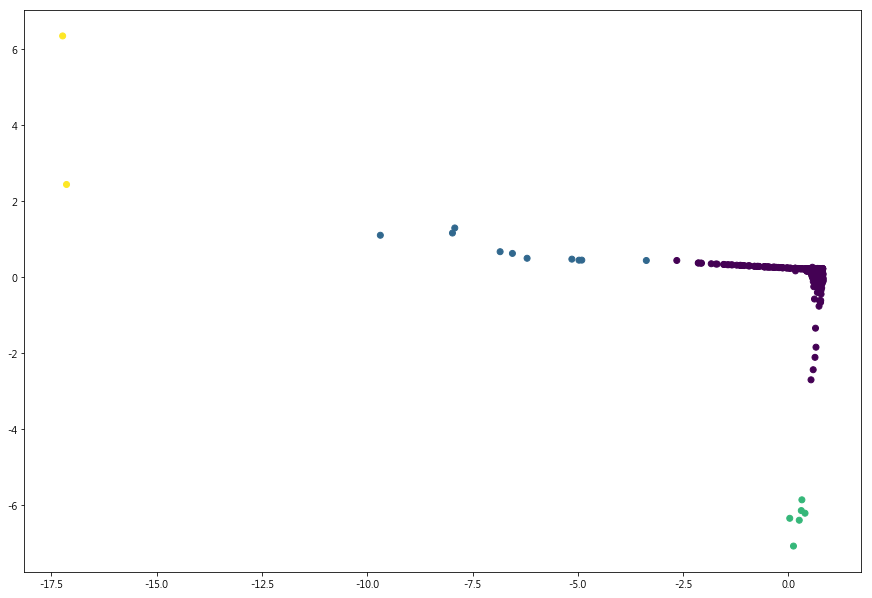

In [26]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(bottom=0.1)
plt.scatter(mds[:, 0], mds[:, 1], c=clustering.labels_)
plt.show()

# 繪製盒鬚圖

## 一. 抓出標準差

In [27]:
mean = np.mean(NAV, axis=1)
mean = pd.DataFrame(data={'mean':mean, 'label':clustering.labels_})

In [28]:
mean

,mean,label
0,11.074091,0
1,17.139105,0
2,8.479223,0
3,27.019545,0
4,3.265782,0
5,7.670050,0
6,118.415341,0
7,19.292273,0
8,46.397273,0
9,130.278636,0


## 二.繪圖

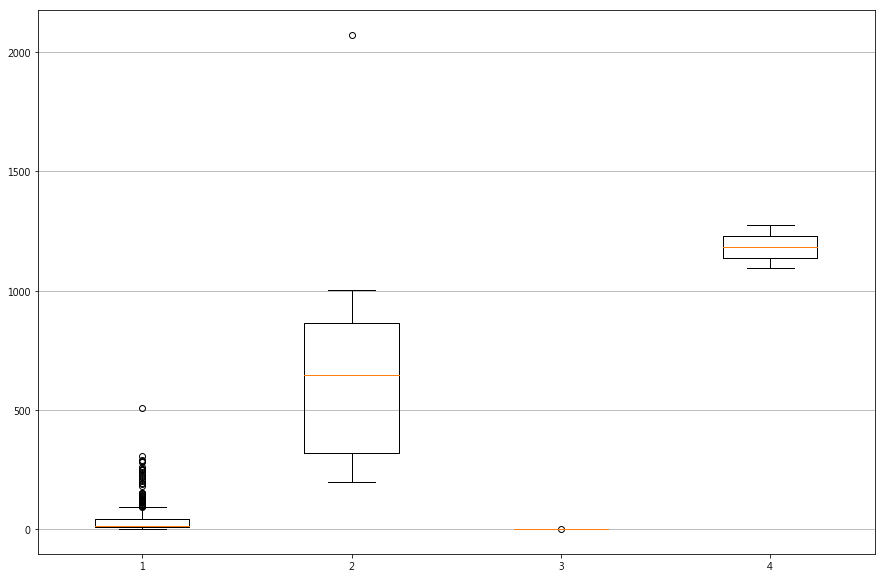

In [29]:
plt.figure(figsize=(15, 10))
plt.grid(axis='y')
plt.boxplot([mean[mean['label'] == 0]['mean'].values,
             mean[mean['label'] == 1]['mean'].values,
             mean[mean['label'] == 2]['mean'].values,
             mean[mean['label'] == 3]['mean'].values])
plt.show()

# 5.抓出四支基金

In [30]:
camp = pd.DataFrame(data=clustering.labels_, index=names,columns=['label'])
name_choose = []
for i in range(4):
    name_choose.append(camp[camp['label'] == i].sample(n=1).index[0])

In [31]:
name_choose

['GSFB9 天達環球能源Ia', 'CTY64 凱利美大成A e Ac', 'T0449D 匯豐中高收A$', 'INZ98 NN 科技X$']

# 抓出四支基金各項數據

## 一. 淨值

In [32]:
NAV_choose = getNAV(name_choose, year+'-01-01', year+'-12-31')

In [33]:
NAV_choose

array([[1.44400e+01, 1.45100e+01, 1.45400e+01, 1.44900e+01, 1.42800e+01,
        1.42200e+01, 1.43800e+01, 1.42900e+01, 1.43000e+01, 1.41800e+01,
        1.43300e+01, 1.42800e+01, 1.41800e+01, 1.42500e+01, 1.40800e+01,
        1.42200e+01, 1.38800e+01, 1.40400e+01, 1.39000e+01, 1.36300e+01,
        1.36300e+01, 1.38200e+01, 1.39200e+01, 1.39200e+01, 1.39500e+01,
        1.38700e+01, 1.37500e+01, 1.36300e+01, 1.36300e+01, 1.36100e+01,
        1.37400e+01, 1.35200e+01, 1.35600e+01, 1.35600e+01, 1.35600e+01,
        1.34700e+01, 1.34800e+01, 1.35100e+01, 1.34400e+01, 1.30300e+01,
        1.30600e+01, 1.30700e+01, 1.30900e+01, 1.28700e+01, 1.31700e+01,
        1.31700e+01, 1.31700e+01, 1.31100e+01, 1.30000e+01, 1.29800e+01,
        1.29800e+01, 1.29800e+01, 1.29800e+01, 1.29800e+01, 1.29800e+01,
        1.29800e+01, 1.29800e+01, 1.32600e+01, 1.33800e+01, 1.33600e+01,
        1.34800e+01, 1.34500e+01, 1.33900e+01, 1.31400e+01, 1.31400e+01,
        1.31400e+01, 1.30700e+01, 1.28100e+01, 1.28

## 二. 漲跌幅

In [34]:
temp = np.zeros((len(name_choose), len(NAV_choose[0])-1))
for j in range (len(name_choose)):
    for i in range (len(NAV_choose[0])-1):
        temp[j][i] = (NAV_choose[j][i+1] - NAV_choose[j][i]) / NAV_choose[j][i]

rate_choose = []
for i in range(len(temp[0])):
    rate_choose.append((temp[0][i] + temp[1][i] + temp[2][i] + temp[3][i])/4)

In [35]:
rate_choose

[0.0040857425777838605,
 0.002980749031288924,
 0.0020467139803571873,
 -0.005883348667145808,
 -0.0012600609132337477,
 0.0035853130281722945,
 -0.0014763482603544996,
 0.0013001918204020425,
 -0.0024683822401664903,
 0.0015394552638210326,
 0.0015052540501792452,
 -0.005094589598121759,
 0.0023250912572273163,
 -0.0027941238149328113,
 0.007178087456304981,
 -0.004094664547664863,
 0.006501260882750243,
 -0.002535944960088909,
 -0.0030197790020690886,
 -0.00040207916969494853,
 0.0049817755805241235,
 0.0033198150438901704,
 0.004054471118011353,
 0.0026995175241943106,
 0.0011951191228053441,
 -0.0033885293417260974,
 -0.00014268564483282703,
 0.0,
 -0.0005873612331447531,
 0.00617598193434606,
 -0.004432795008197011,
 9.925703198893716e-05,
 -0.00014688601645121768,
 -7.348618459728762e-05,
 0.001502215225034297,
 -0.002398689131341995,
 0.0004940698943130837,
 -0.0010252161535871328,
 -0.007491110311436158,
 0.0010012293429444844,
 0.00036712295506863345,
 0.0021717834856193738,
 

## 三. 收益率

In [36]:
profit_choose = []
temp = NAV_choose[0][0] + NAV_choose[1][0] + NAV_choose[2][0] + NAV_choose[3][0]
for i in range(len(NAV_choose[0])):
    profit_choose.append((NAV_choose[0][i] + NAV_choose[1][i] + NAV_choose[2][i] + NAV_choose[3][i] - temp) / temp * 100)

In [37]:
profit_choose

[0.0,
 0.3164493274715483,
 0.33990534148486257,
 1.1832559822477593,
 1.0464187154448965,
 1.2265426711877132,
 1.5189609792202108,
 1.3557365731850504,
 1.6628806299254537,
 1.6544308550716338,
 1.1672750387690491,
 1.5795609412838918,
 1.1537974725706601,
 1.4862207312596307,
 1.6496695296560777,
 2.7113399134055864,
 3.338243084946186,
 4.010817114265153,
 3.951205881043295,
 4.343121164512201,
 4.357145687091159,
 4.577996856403275,
 4.829035810566556,
 5.594052480464718,
 5.863351363025823,
 6.316399540416389,
 6.408968401698793,
 6.73083119488583,
 6.73083119488583,
 6.729407705844056,
 7.354193174475239,
 7.298116120943268,
 7.175429597422575,
 7.1754155728999995,
 7.1754085606387115,
 7.768596779899499,
 7.490897208313604,
 7.439700688639111,
 7.5385946096046315,
 7.631086336012824,
 7.687941750547924,
 8.143051532757603,
 8.406719569503252,
 8.164095328887337,
 8.485284944990562,
 8.786153027876896,
 8.945282273319009,
 8.882866135581363,
 7.460828631904313,
 8.26306638472700

# 繪製漲跌幅對比圖

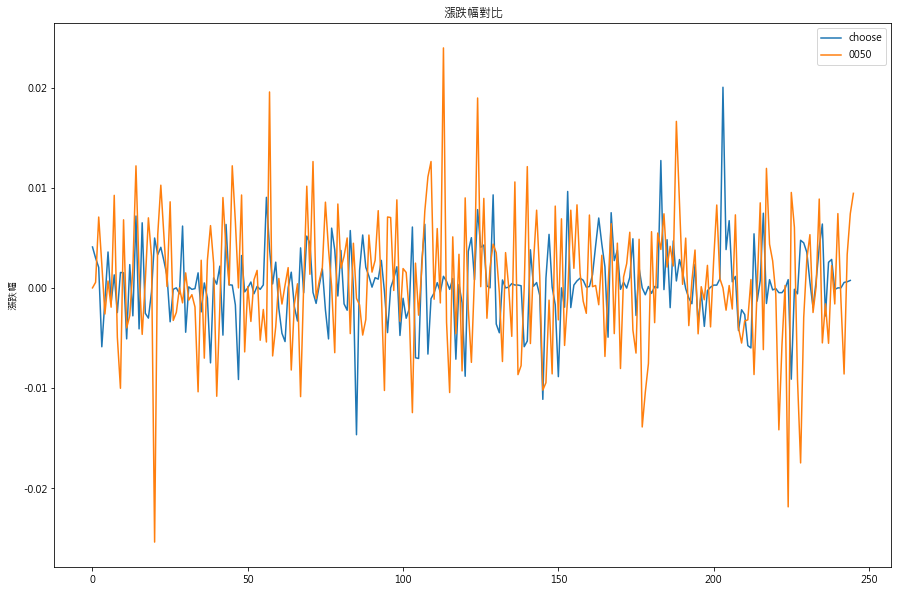

In [38]:
plt.figure(figsize=(15, 10))
plt.ylabel('漲跌幅')
plt.title('漲跌幅對比')
plt.plot(rate_choose)
plt.plot(rate_0050)
plt.legend(['choose','0050'])
plt.show()

# 繪製收益率對比圖

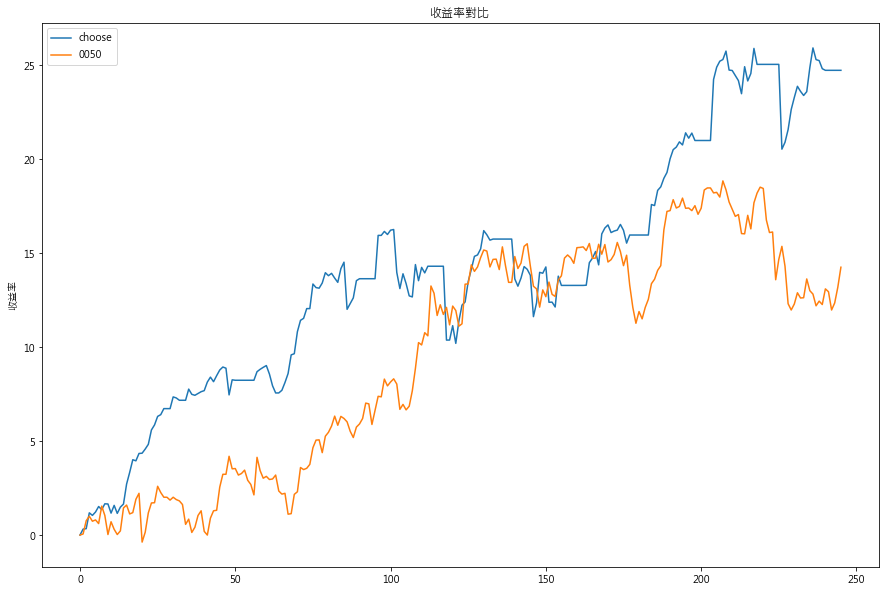

In [39]:
plt.figure(figsize=(15, 10))
plt.ylabel('收益率')
plt.title('收益率對比')
plt.plot(profit_choose)
plt.plot(profit_0050)
plt.legend(['choose','0050'])
plt.show()